# Lehmer generator of uniformly distributed random numbers.

In [35]:
DEFAULT_FACTOR = '134775813'
DEFAULT_MODULE = '134775811'
DEFAULT_INTERVALS = '20'
DEFAULT_AMOUNT = '50000'
DEFAULT_SEED = '1'

In [36]:
class Lehmer:
    """ R[n] = factor * R[n-1] % module, n > 1
    """

    def __init__(self, *, factor, module, seed):
        """
        """

        self.__factor = factor

        if not module > 0:
            raise AttributeError("Module must be greater than zero 0")
        self.__module = module

        self.__current_state = seed

    @property
    def factor(self):
        return self.__factor

    @property
    def module(self):
        return self.__module

    @property
    def current_state(self):
        return self.__current_state

    def __call__(self, *args, **kwargs):
        """
        """

        while True:
            number = self.factor * self.current_state % self.module
            yield number / self.module
            self.__current_state = number

In [37]:
import numpy as np
# from generators import Lehmer
import itertools


numbers = None


def generate_random_numbers(factor, module, amount, seed=1):
    """ Generate sequence of random numbers.
    """
    
    generator = Lehmer(factor=factor, module=module, seed=seed)
    return list(itertools.islice(generator(), amount))
    

def calculate_expected_value(numbers):
    """  Calculates expected values of list of numbers
    """
    
    return np.mean(numbers)


def calculate_variance(numbers):
    """  Calculates variance of list of numbers.
    """
    
    expected_value = calculate_expected_value(numbers)
    return sum((number - expected_value) ** 2 for number in numbers) / (len(numbers) - 1)


def calculate_uniformity(numbers):
    nums = numbers[:]
    
    counter = 0
    for index in range(len(nums) // 2):
        num1 = nums.pop()
        num2 = nums.pop()

        if (num1 ** 2 + num2 ** 2) < 1:
            counter += 1
    return counter*2 / state.amount

def get_info_about_period(numbers):
    """ 
    """
    
    last_number = numbers[-1]
    local_numbers = list(numbers[:-1])
    
    if last_number not in local_numbers:
        return "period > {}".format(len(numbers))
    
    local_numbers = list(reversed(local_numbers))
    period = local_numbers.index(last_number)
    
    return int(period)

In [38]:
import pandas as pd
import math
from collections import OrderedDict

def calculate_and_show_table(numbers):
    """ Show table with some info about Lehmer generator.
    """

    data = OrderedDict()

    expected_value = calculate_expected_value(numbers)
    variance = calculate_variance(numbers)
    uniformity = calculate_uniformity(numbers)
    period = get_info_about_period(numbers)

    data["Expected value"] = expected_value
    data["Variance"] = variance
    data["Standard deviation"] = math.sqrt(variance)
    data["Period"] = period
    if type(period) != str:
        data["Апереодичность"] = period + len(numbers) % period
    data["Uniformity"] = uniformity
    data["Pi/4"] = math.pi / 4
    
    data = pd.Series(data)

    print(pd.DataFrame(data))


In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt


def print_histogram(numbers):
    """ Show histogram.
    """
    
    plt.hist(numbers, state.intervals, facecolor='blue')

    plt.xlabel('Values')
    plt.ylabel('Number of values')
    plt.title('Histogram')

    plt.grid(True)

    plt.show()

In [40]:
%matplotlib inline 

def print_fft(numbers):
    """  Show fft graphic.
    """
    
    fc = np.fft.fft(numbers)
    fc = list(map(np.angle, fc))
    
    plt.grid()
    plt.plot(fc, linestyle = ":",
        marker = "h",
        color = "m",
        markerfacecolor = "c")

    plt.show()

In [41]:
def main():
    numbers = generate_random_numbers(state.factor, state.module, state.amount, seed=1)
    
    calculate_and_show_table(numbers)
    print_histogram(numbers)
#     from pprint import pprint
#     pprint(numbers)
    # print_fft(numbers)

                           0
Expected value      0.500000
Variance            0.050001
Standard deviation  0.223609
Period              3.000000
Апереодичность      5.000000
Uniformity          0.500000
Pi/4                0.785398


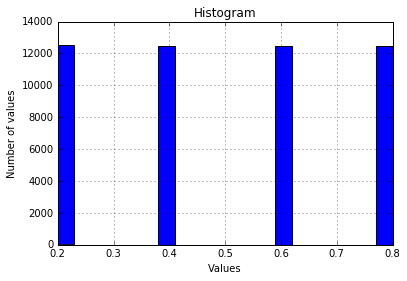

In [43]:
from ipywidgets import widgets, interact
from IPython.display import display


class State:
    
    def __init__(self):
        self.__factor = int(DEFAULT_FACTOR)
        self.__module = int(DEFAULT_MODULE)
        self.__intervals = int(DEFAULT_INTERVALS)
        self.__amount = int(DEFAULT_AMOUNT)
        self.__seed = int(DEFAULT_SEED)
    
    # --- Getters ---
    @property
    def factor(self):
        return self.__factor
    
    @property
    def module(self):
        return self.__module
    
    @property
    def intervals(self):
        return self.__intervals
    
    @property
    def amount(self):
        return self.__amount
    
    @property
    def seed(self):
        return self.__seed
    
    # --- Setters ---
    @factor.setter
    def factor(self, value):
        self.__factor = int(value)
        
    @module.setter
    def module(self, value):
        self.__module = int(value)
    
    @intervals.setter
    def intervals(self, value):
        self.__intervals = int(value)
    
    @amount.setter
    def amount(self, value):
        self.__amount = int(value)
    
    @seed.setter
    def seed(self, value):
        self.__seed = int(value)

state = State()

def _handler(factor, module, intervals, amount, seed):
    """  Event handler for cange state of inputs.
    """
    
    state.factor = factor
    state.module = module
    state.intervals = intervals
    state.amount = amount 
    state.seed = seed

interact(_handler, factor=DEFAULT_FACTOR, module=DEFAULT_MODULE, intervals=DEFAULT_INTERVALS,
        amount=DEFAULT_AMOUNT, seed=DEFAULT_SEED)

button = widgets.Button(description="Calculate")
display(button)

def on_button_clicked(button):
    main()

button.on_click(on_button_clicked)

